## imports

In [1]:
import pandas as pd
import requests 
import json
import matplotlib.pyplot as plt

## methods

In [16]:
def get_data_all() -> pd.DataFrame:
    r = requests.get('https://glusfqycvwrucp9-db202202211424.adb.eu-zurich-1.oraclecloudapps.com/ords/sensor_datalake2/sens/any_sensor_data_entry/',auth=('SENSOR_DATALAKE2', 'smarTclassrooM2Da'))

    df = pd.json_normalize(r.json()["items"])

    df.set_index(pd.DatetimeIndex(df["inserttime"]), inplace=True)
    df.drop("inserttime", axis=1, inplace=True)

    return df

def show_data(data:pd.DataFrame):
    x = data.index.values

    device1_hum = data["device1humidity"].values
    device2_hum = data["device2humidity"].values
    device3_hum = data["device3humidity"].values

    device1_co2 = data["device1co2"].values
    device2_co2 = data["device2co2"].values
    device3_co2 = data["device3co2"].values

    device1_temp = data["device1temp"].values
    device2_temp = data["device2temp"].values
    device3_temp = data["device3temp"].values

    device3_window1 = data["device3window1a"].values
    device3_window2 = data["device3window2b"].values
    device3_window3 = data["device3window3a"].values
    device3_window4 = data["device3window4b"].values
    device3_window5 = data["device3window5a"].values

    device1_light = data["device1light"].values
    device2_light = data["device2light"].values
    device3_light = data["device3light"].values

    fig, ax = plt.subplots(5, 1, sharex=True, figsize=(15,15))

    ax[0].set_title("Humidity")
    ax[0].plot(x, device1_hum, label="Device1")
    ax[0].plot(x, device2_hum, label="Device2")
    ax[0].plot(x, device3_hum, label="Device3")
    ax[0].legend(loc="right")
    ax[0].set_ylabel("Humidity in %")

    ax[1].set_title("CO2")
    ax[1].plot(x, device1_co2, label="Device1")
    ax[1].plot(x, device2_co2, label="Device2")
    ax[1].plot(x, device3_co2, label="Device3")
    ax[1].legend(loc="right")
    ax[1].set_ylabel("CO2 in ppM")

    ax[2].set_title("Temperature")
    ax[2].plot(x, device1_temp, label="Device1")
    ax[2].plot(x, device2_temp, label="Device2")
    ax[2].plot(x, device3_temp, label="Device3")
    ax[2].legend(loc="right")
    ax[2].set_ylabel("Temperature in °C")

    ax[3].set_title("Lightstrength")
    ax[3].plot(x, device1_light, label="Device1")
    ax[3].plot(x, device2_light, label="Device2")
    ax[3].plot(x, device3_light, label="Device3")
    ax[3].legend(loc="right")
    ax[3].set_ylabel("Lightstrength in lumen")

    ax[4].set_title("Window")
    ax[4].plot(x, device3_window1, label="Window1")
    ax[4].plot(x, device3_window2, label="Window2")
    ax[4].plot(x, device3_window3, label="Window3")
    ax[4].plot(x, device3_window4, label="Window4")
    ax[4].plot(x, device3_window5, label="Window5")
    ax[4].legend(loc="right")
    ax[4].set_yticks([0, 1])
    ax[4].set_yticklabels(["closed", "open"])
    ax[4].set_ylabel("State [open; closed]")


2022-04-03T19:51:20.000000000


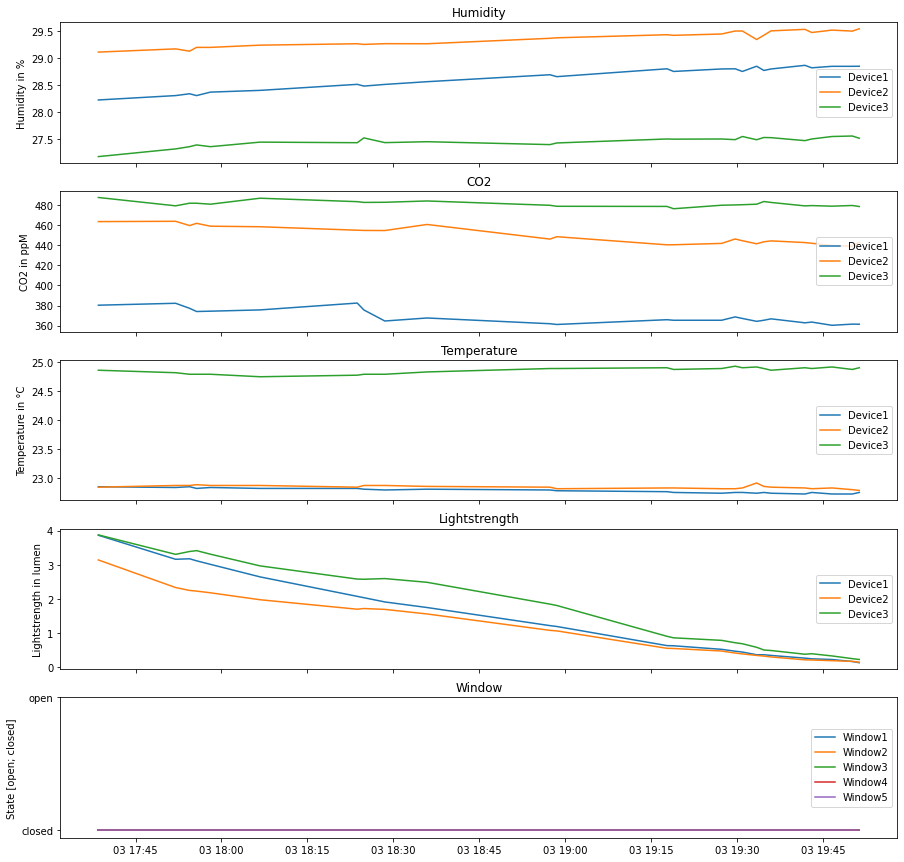

In [17]:
show_data(get_data_all())